In [1]:
%matplotlib inline
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

In [6]:
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

# Working Code

In [7]:
# create model
model = Sequential()
#input
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(50, activation='relu'))
#prediction
model.add(Dense(num_classes, activation='softmax'))

In [8]:
# Compile model
sgd = optimizers.SGD(lr=0.01, decay=0.0, momentum=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=x_train.shape[0], verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 196us/step - loss: 13.9434 - acc: 0.1090 - val_loss: 13.3940 - val_acc: 0.1520
Epoch 2/10
60000/60000 [==============================] - 3s 56us/step - loss: 13.4109 - acc: 0.1500 - val_loss: 13.6618 - val_acc: 0.1409
Epoch 3/10
60000/60000 [==============================] - 4s 68us/step - loss: 13.6567 - acc: 0.1407 - val_loss: 12.7207 - val_acc: 0.1946
Epoch 4/10
60000/60000 [==============================] - 4s 59us/step - loss: 12.7362 - acc: 0.1934 - val_loss: 12.3095 - val_acc: 0.2209
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 12.4026 - acc: 0.2157 - val_loss: 12.0105 - val_acc: 0.2383
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 11.9964 - acc: 0.2379 - val_loss: 11.5822 - val_acc: 0.2673
Epoch 7/10
60000/60000 [==============================] - 4s 65us/

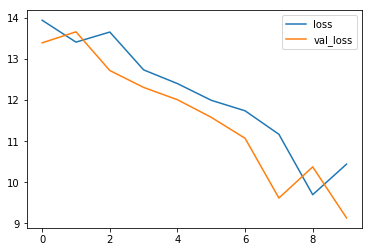

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

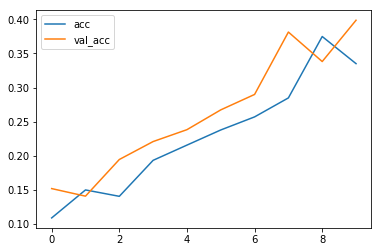

In [11]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()

# Development

In [52]:
import keras as keras

class Gradients(keras.callbacks.Callback):
    def __init__(self, x_train, y_train):
        self.x_train = x_train  
        self.y_train = y_train
        
    def on_train_begin(self, logs={}):
        self._data = []
        input_tensors = [self.model.inputs[0],
                         self.model.sample_weights[0],
                         self.model.targets[0],
                         K.learning_phase()]
        grads = K.gradients(self.model.total_loss, self.model.trainable_weights)
        self.get_gradients = K.function(inputs=input_tensors, outputs=grads)

    def on_batch_end(self, batch, logs={}):
        inputs = [self.x_train,  
                  [1,]*self.x_train.shape[0],      
                  y_train,  
                  1]    # Training phase
        gradient = self.get_gradients(inputs)
        self._data.append({'gradient': gradient})

In [59]:
# create model
model = Sequential()
#input
model.add(Dense(2, input_dim=x_train.shape[1], activation='relu'))
#prediction
model.add(Dense(num_classes, activation='softmax'))

# Compile model
sgd = optimizers.SGD(lr=0.01, decay=0.0, momentum=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

gradients = Gradients(x_train, y_train)
history = model.fit(x_train, y_train, callbacks=[gradients], epochs=1, batch_size=x_train.shape[0], verbose=1, validation_data=(x_test, y_test))
print(history.history.keys())

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2s 36us/step - loss: 4.4050 - acc: 0.1215 - val_loss: 2.3139 - val_acc: 0.1135
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [60]:
gradients._data

[{'gradient': [array([[0., 0.],
          [0., 0.],
          [0., 0.],
          ...,
          [0., 0.],
          [0., 0.],
          [0., 0.]], dtype=float32),
   array([0.00039531, 0.        ], dtype=float32),
   array([[-8.9122467e-03,  8.9606347e-06, -8.8915753e-04, -1.2495000e-03,
            1.9039799e-02, -2.1056272e-03, -5.7107589e-04, -1.2823051e-03,
            7.6560109e-06, -4.0465025e-03],
          [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
            0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
            0.0000000e+00,  0.0000000e+00]], dtype=float32),
   array([ 0.0011893 , -0.01249554,  0.00049303, -0.00229944,  0.00329607,
           0.00974517,  0.00125554, -0.00434027,  0.00235399,  0.00079398],
         dtype=float32)]}]

In [70]:
for i in range(len(gradients._data[0]['gradient'])):
    print(gradients._data[0]['gradient'][i].shape)

(784, 2)
(2,)
(2, 10)
(10,)


In [ ]:
gradients._data[0]['gradient'][0].shape

In [12]:
#grads = K.gradients(model.loss, model.trainable_weights)

In [17]:
import keras.backend as K

# Get a "l2 norm of gradients" tensor
def get_gradient_norm(model):
    with K.name_scope('gradient_norm'):
        grads = K.gradients(model.total_loss, model.trainable_weights)
        norm = K.sqrt(sum([K.sum(K.square(g)) for g in grads]))
    return norm

# create model
model = Sequential()
#input
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(50, activation='relu'))
#prediction
model.add(Dense(num_classes, activation='softmax'))

# Append the "l2 norm of gradients" tensor as a metric
model.model.metrics_names.append("gradient_norm")
model.metrics_tensors.append(get_gradient_norm(model))

# Compile model
sgd = optimizers.SGD(lr=0.01, decay=0.0, momentum=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy', 'gradient_norm'])

# You can compute the norm within the usual training routine
history = model.fit(x_train, y_train, epochs=1, batch_size=x_train.shape[0], verbose=1, validation_data=(x_test, y_test))
print(history.history.keys())
print(history.history['gradient_norm'])

AttributeError: 'Sequential' object has no attribute 'metrics_names'

In [ ]:
class Gradients(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        # Indexes of the layers which we keep track of. Basically, this will be any layer
        # which has a 'kernel' attribute, which is essentially the "Dense" or "Dense"-like layers
        self.layerixs = []

        # Functions return activity of each layer
        self.layerfuncs = []

        # Functions return weights of each layer
        self.layerweights = []
        for lndx, l in enumerate(self.model.layers):
            if hasattr(l, 'kernel'):
                self.layerixs.append(lndx)
                self.layerfuncs.append(K.function(self.model.inputs, [l.output,]))
                self.layerweights.append(l.kernel)

        input_tensors = [self.model.inputs[0],
                         self.model.sample_weights[0],
                         self.model.targets[0],
                         K.learning_phase()]
        
        # Get gradients of all the relevant layers at once
        grads = self.model.optimizer.get_gradients(self.model.total_loss, self.layerweights)
        self.get_gradients = K.function(inputs=input_tensors,
                                        outputs=grads)

        # Get cross-entropy loss
        self.get_loss = K.function(inputs=input_tensors, outputs=[self.model.total_loss,])


    def on_batch_begin(self, batch, logs={}):
        for lndx, g in enumerate(self.get_gradients(inputs)):
            # g is gradients for weights of lndx's layer
            self._batch_gradients[lndx].append(g)


    def on_epoch_end(self, epoch, logs={}):

        data = {
            'gradmean'     : [],   # Mean of gradients
            'gradstd'      : [],   # Std of gradients
        }

        for lndx, layerix in enumerate(self.layerixs):
            clayer = self.model.layers[layerix]

            stackedgrads = np.stack(self._batch_gradients[lndx], axis=1)
            data['gradmean'    ].append( np.linalg.norm(stackedgrads.mean(axis=1)) )
            data['gradstd'     ].append( np.linalg.norm(stackedgrads.std(axis=1)) )

In [ ]:
gradients = model.optimizer.get_gradients(model.model.total_loss, weights)

In [ ]:
weights = model.trainable_weights # weight tensors
gradients = model.optimizer.get_gradients(model.total_loss, weights) # gradient tensors

print(weights)

In [ ]:
import keras.backend as K

input_tensors = [model.inputs[0], # input data
                 model.sample_weights[0], # how much to weight each sample by
                 model.targets[0], # labels
                 K.learning_phase(), # train or test mode
]

get_gradients = K.function(inputs=input_tensors, outputs=gradients)

In [ ]:
from keras.utils.np_utils import to_categorical

inputs = [[[1, 2]], # X
          [1], # sample weights
          [[1]], # y
          0 # learning phase in TEST mode
]

print(zip(weights, get_gradients(inputs)))